# 1. Introduction 👋
<center><img src="https://www.researchgate.net/profile/Serdar-Yuksel/publication/341495187/figure/fig3/AS:893006181847044@1589920673562/The-father-of-medicine-Hippocrates.jpg" alt="Drug Picture" width="700" height="700"></center><br>

## Data Set Problems 🤔
👉 This dataset contains information about drug classification based on patient general information and its diagnosis. Machine learning model is needed in order **to predict the outcome of the drugs type** that might be suitable for the patient.

---

## Objectives of Notebook 📌
👉 **This notebook aims to:**
*   Dataset exploration using various types of data visualization.
*   Build various ML models that can predict drug type.

👨‍💻 **The machine learning models used in this project are:** 
1. Linear Logistic Regression
2. Linear Support Vector Machine (SVM)
3. K Neighbours
4. Naive Bayes (Categorical & Gaussian)
5. Decision Tree
6. Random Forest

---

## Data Set Description 🧾

👉 There are **6 variables** in this data set:
*   **4 categorical** variables,and
*   **2 continuous** variables.

<br>

👉 The following is the **structure of the data set**.


<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:14px">Variable Name</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Sample Data</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>Age</b></td>
<td>Patient Age</td>
<td>23; 47; ...</td>
</tr>
<tr>
<td><b>Sex</b></td>
<td>Gender of patient <br> (male or female)</td>
<td>F; M; ...</td>
</tr>
<tr>
<td><b>BP</b></td>
<td>Levels of blood pressure <br> (high, normal, or low)</td>
<td>HIGH; NORMAL; LOW; ...</td>
</tr>
<tr>
<td><b>Cholesterol</b></td>
<td>Levels of cholesterol <br> (high or normal)</td>
<td>1.4; 1.3; ...</td>
</tr>
<tr>
<td><b>Na_to_K</b></td>
<td>Sodium to potassium ratio in blood</td>
<td>25.355; 13.093; ...</td>
</tr>
<tr>
<td><b>Drug</b></td>
<td>Type of drug</td>
<td>DrugY; drugC; ...</td>
</tr>
</tbody>
</table>

---



# 2. Importing Libraries 📚
👉 **Importing libraries** that will be used in this notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# 3. Reading Data Set 👓
👉 After importing libraries, we will also **import the dataset** that will be used.

In [49]:
df_drug = pd.read_csv(r"C:\Users\Lokesh Patra\Documents\Projects\IBM ICE Day 2\drug200.csv")

👉 Read the first 6 rows in the dataset.

In [50]:
df_drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


👉 Data type and checking null in dataset:

In [4]:
print(df_drug.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


👉 From the results above, **there are no missing/null value** in this dataset

# 4. Initial Dataset Exploration 🔍
👉 This section will explore raw dataset that has been imported.

## 4.1 Categorical Variables 📊

In [5]:
df_drug.Drug.value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

👉 It can be seen that from results above, DrugY has more amount than other types of drugs

In [6]:
df_drug.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

👉 The distribution of patient gender is balanced.

In [7]:
df_drug.BP.value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

👉 The distribution of blood pressure level is balanced.

In [8]:
df_drug.Cholesterol.value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

👉 The distribution of cholesterol level is balanced.

## 4.2 Numerical Variables 🔢
👉 This section will show mean, count, std, min, max and others using describe function. The skewness value for each numerical variables will also shown in this section.

In [9]:
df_drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [10]:
skewAge = df_drug.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

Age skewness:  0.03030835703000607


In [11]:
skewNatoK = df_drug.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

Na to K skewness:  1.039341186028881


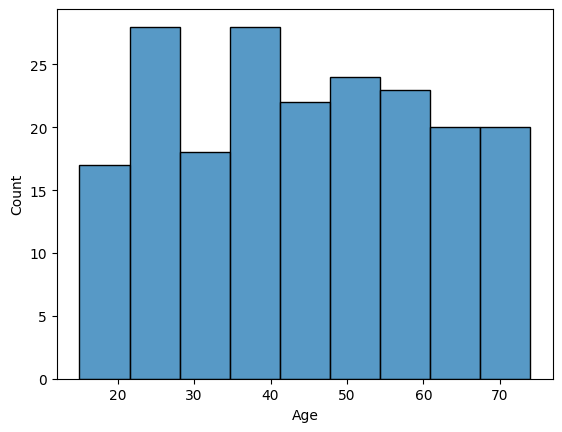

In [12]:
sns.histplot(df_drug['Age']);

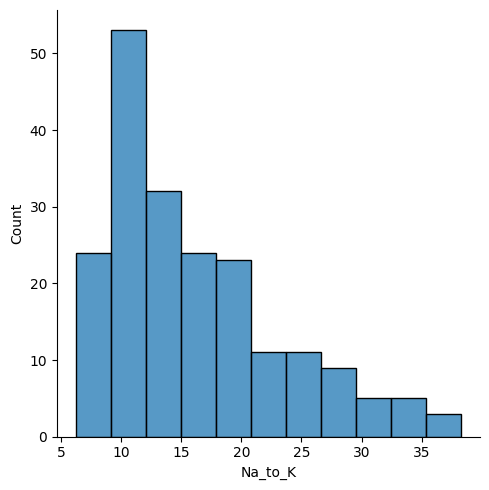

In [13]:
sns.displot(df_drug['Na_to_K']);

👉The distribution of **'Age'** column is **symetric**, since the skewness value  between -0.5 and 0.5 <br>
👉The distribution of **'Na_to_K'** column is **moderately skewed**, since the skewness value is ***between 0.5 and 1***. It can also be seen from the histogram for 'Na_to_K' column

# 5. EDA 📊
👉 This section will explore variables in the dataset using different various plots/charts.

## 5.1 Drug Type Distribution 💊

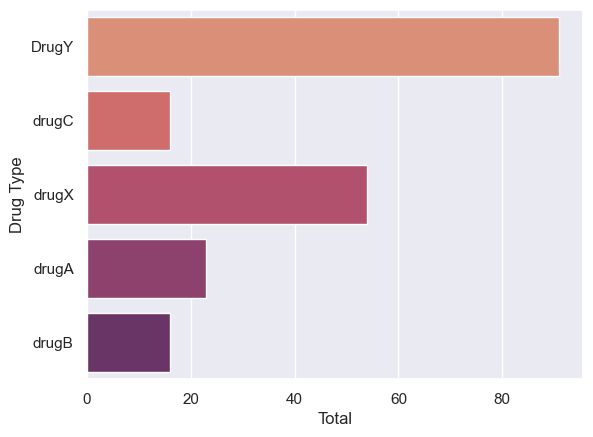

In [14]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df_drug, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

## 5.2 Gender Distribution 👫

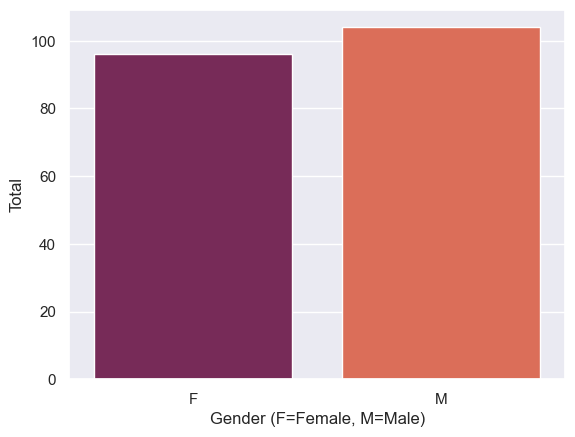

In [15]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=df_drug, palette="rocket")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

## 5.3 Blood Pressure Distribution 🩸

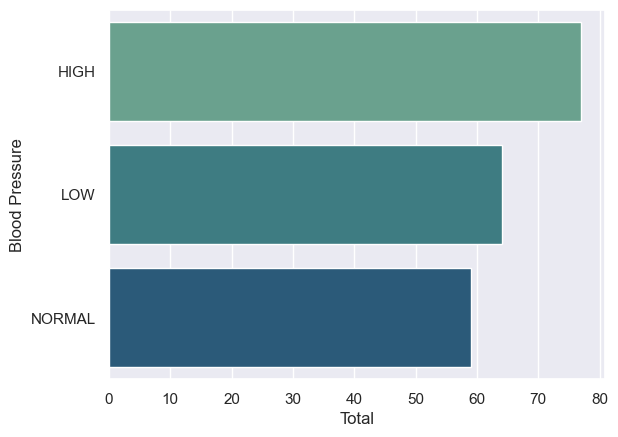

In [16]:
sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=df_drug, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

## 5.4 Cholesterol Distribution 🥛

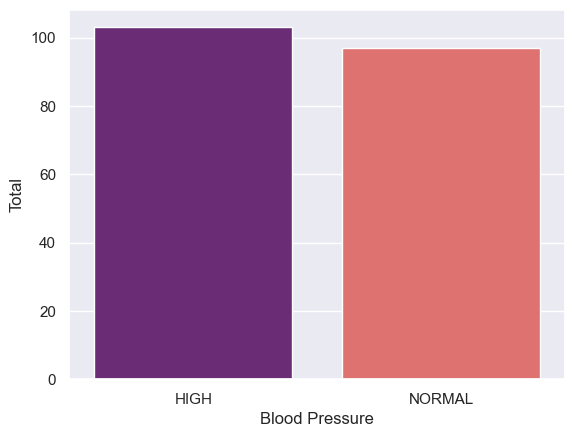

In [17]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=df_drug, palette="magma")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

## 5.5 Gender Distribution based on Drug Type 👫💊

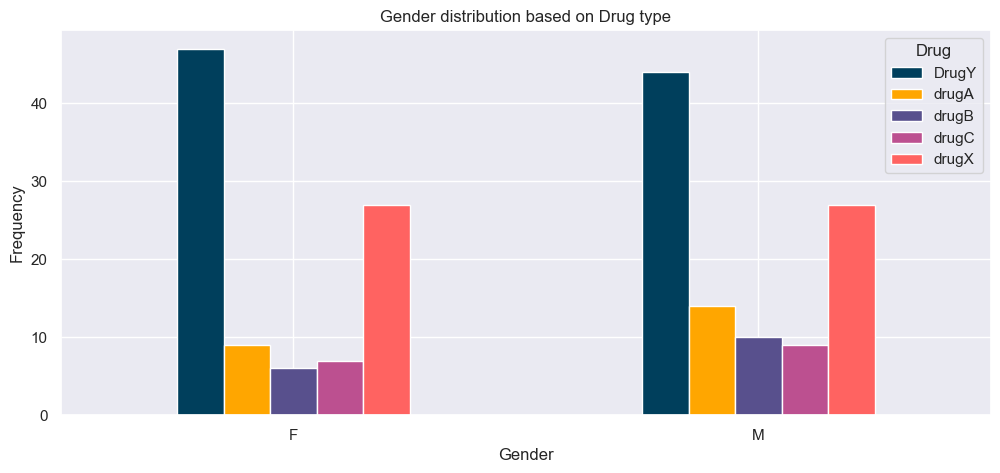

In [18]:
pd.crosstab(df_drug.Sex,df_drug.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

## 5.6 Blood Pressure Distribution based on Cholesetrol 🩸🥛

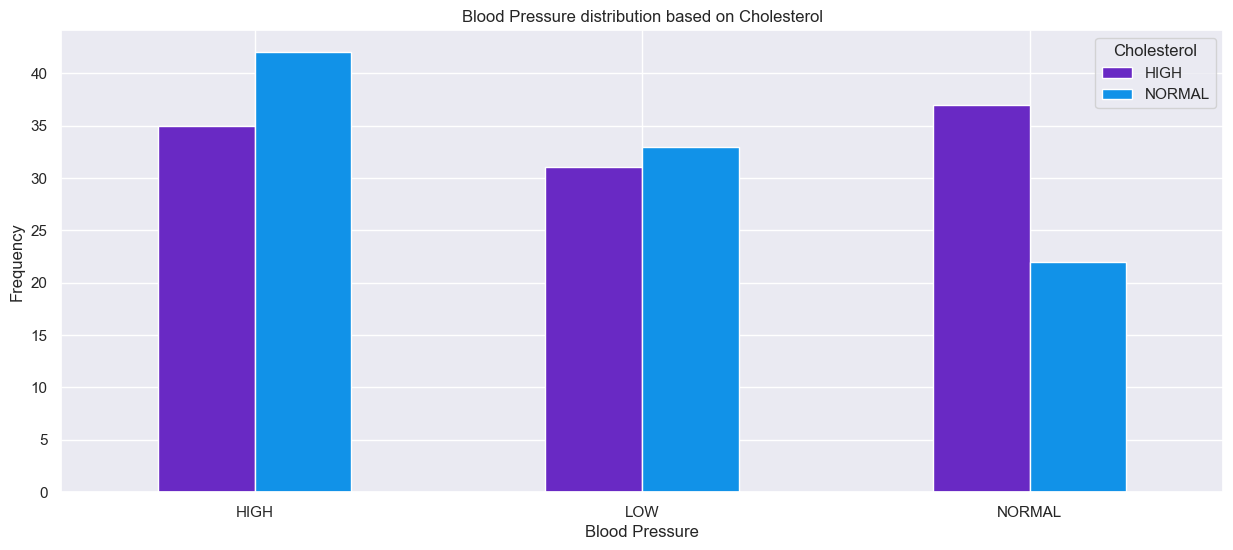

In [19]:
pd.crosstab(df_drug.BP,df_drug.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

## 5.7 Sodium to Potassium Distribution based on Gender and Age 🧪👫👴

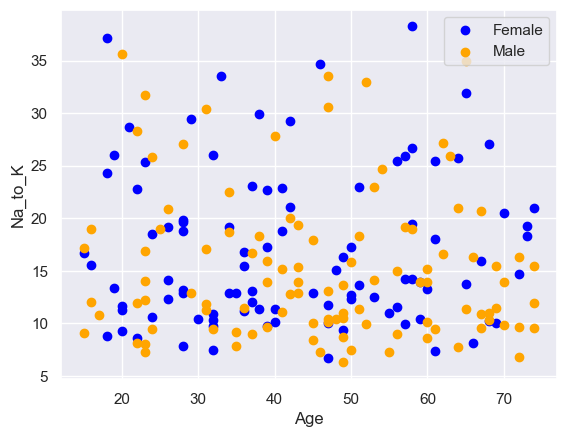

In [20]:
plt.scatter(x=df_drug.Age[df_drug.Sex=='F'], y=df_drug.Na_to_K[(df_drug.Sex=='F')], c="Blue")
plt.scatter(x=df_drug.Age[df_drug.Sex=='M'], y=df_drug.Na_to_K[(df_drug.Sex=='M')], c="Orange")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

# 6. Dataset Preparation ⚙
👉 This section will prepare the dataset before building the machine learning models.

## 6.1 Data Binning 🚮

### 6.1.1 Age 👴
👉 The age will be divided into **7 age categories**:
*  Below 20 y.o.
*  20 - 29 y.o.
*  30 - 39 y.o.
*  40 - 49 y.o.
*  50 - 59 y.o.
*  60 - 69 y.o.
*  Above 70.

In [21]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df_drug['Age_binned'] = pd.cut(df_drug['Age'], bins=bin_age, labels=category_age)
df_drug = df_drug.drop(['Age'], axis = 1)

### 6.1.2 Na_to_K 🧪
👉 The chemical ratio will be divided into **4 categories**:
*  Below 10.
*  10 - 20.
*  20 - 30.
*  Above 30.

In [22]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df_drug['Na_to_K_binned'] = pd.cut(df_drug['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df_drug = df_drug.drop(['Na_to_K'], axis = 1)

## 6.2 Splitting the dataset 🪓
👉 The dataset will be split into **70% training and 30% testing**.

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [24]:
X = df_drug.drop(["Drug"], axis=1)
y = df_drug["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 6.3 Feature Engineering 🔧
👉 The FE method that used is **one-hot encoding**, which is **transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction**.

##### >Creating new variables that aren't in a dataset.

In [25]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [26]:
X_train.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
131,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True
96,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True
181,True,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False
19,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False
153,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,False


In [27]:
X_test.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
18,False,True,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False
170,True,False,False,False,True,True,False,False,True,False,False,False,False,False,False,True,False,False
107,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False
98,False,True,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
177,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False


## 6.4 SMOTE Technique ⚒

👉 Since the number of 'DrugY' is more than other types of drugs, **oversampling is carried out to avoid overfitting**.

In [28]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

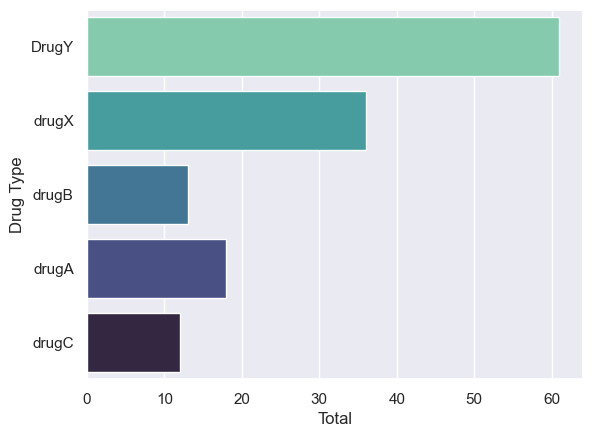

In [29]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df_drug, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

👉 As can be seen, the distrubtion of drug type are now balanced.

# 7. Models 🛠

## 7.1 Logistic Regression

In [30]:
# Logistic Regression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)
y_pred_lr = LRclassifier.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print('Logistic Regression accuracy: {:.2f}%'.format(lr_accuracy * 100))
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression accuracy: 83.33%
              precision    recall  f1-score   support

       DrugY       0.95      0.70      0.81        30
       drugA       0.67      0.80      0.73         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.83        60
   macro avg       0.77      0.90      0.82        60
weighted avg       0.86      0.83      0.83        60

[[21  2  1  2  4]
 [ 1  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]


## 7.2 K Neighbours

In [31]:
# K Nearest Neighbors
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)
y_pred_knn = KNclassifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print('K Nearest Neighbors accuracy: {:.2f}%'.format(knn_accuracy * 100))
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))


K Nearest Neighbors accuracy: 65.00%
              precision    recall  f1-score   support

       DrugY       0.65      0.73      0.69        30
       drugA       0.67      0.40      0.50         5
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         4
       drugX       0.71      0.83      0.77        18

    accuracy                           0.65        60
   macro avg       0.41      0.39      0.39        60
weighted avg       0.59      0.65      0.62        60

[[22  0  1  1  6]
 [ 3  2  0  0  0]
 [ 2  1  0  0  0]
 [ 4  0  0  0  0]
 [ 3  0  0  0 15]]


In [32]:
# K Neighbors Classifier - Model Tuning
score_list_knn = []
for i in range(1, 30):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train, y_train)
    score_list_knn.append(knn_classifier.score(X_test, y_test))

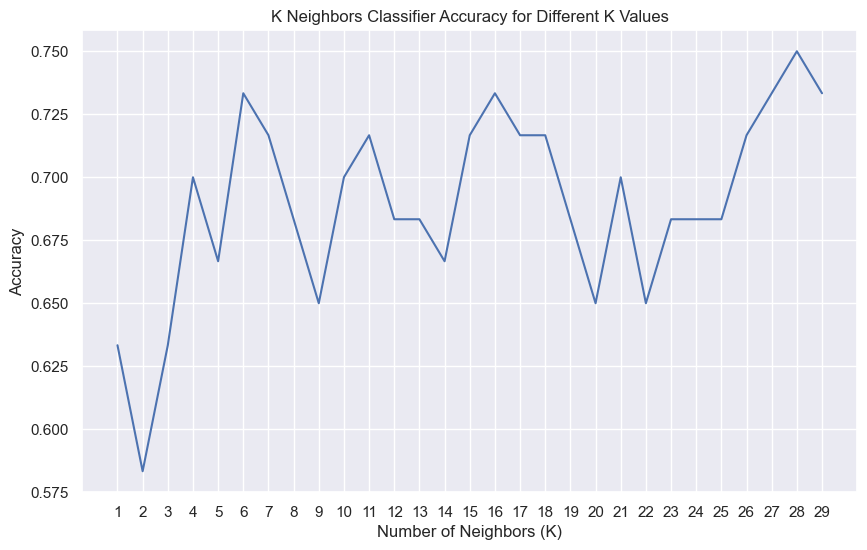

In [33]:
# Plot K Neighbors Classifier - Model Tuning
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), score_list_knn)
plt.title('K Neighbors Classifier Accuracy for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 30, 1))
plt.grid(True)
plt.show()

## 7.3 Support Vector Machine (SVM)

In [34]:
# Support Vector Machine
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)
y_pred_svc = SVCclassifier.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred_svc)
SVCAcc = svc_accuracy * 100  # Assigning the accuracy value to SVCAcc
print('Support Vector Machine accuracy: {:.2f}%'.format(SVCAcc))
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))

Support Vector Machine accuracy: 85.00%
              precision    recall  f1-score   support

       DrugY       1.00      0.70      0.82        30
       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.85        60
   macro avg       0.79      0.94      0.84        60
weighted avg       0.89      0.85      0.85        60

[[21  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]


## 7.4 Naive Bayes
### 7.4.1 Categorical NB

In [35]:
# Naive Bayes - CategoricalNB
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)
y_pred_nb1 = NBclassifier1.predict(X_test)
nb_accuracy1 = accuracy_score(y_test, y_pred_nb1)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(nb_accuracy1 * 100))
print(classification_report(y_test, y_pred_nb1))
print(confusion_matrix(y_test, y_pred_nb1))

Categorical Naive Bayes accuracy: 81.67%
              precision    recall  f1-score   support

       DrugY       0.95      0.67      0.78        30
       drugA       0.62      1.00      0.77         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.81      0.94      0.87        18

    accuracy                           0.82        60
   macro avg       0.76      0.92      0.82        60
weighted avg       0.85      0.82      0.81        60

[[20  3  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 17]]


### 7.4.2 Gaussian NB

In [36]:
# Naive Bayes - GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)
y_pred_nb2 = NBclassifier2.predict(X_test)
nb_accuracy2 = accuracy_score(y_test, y_pred_nb2)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(nb_accuracy2 * 100))
print(classification_report(y_test, y_pred_nb2))
print(confusion_matrix(y_test, y_pred_nb2))

Gaussian Naive Bayes accuracy: 85.00%
              precision    recall  f1-score   support

       DrugY       1.00      0.70      0.82        30
       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.85        60
   macro avg       0.79      0.94      0.84        60
weighted avg       0.89      0.85      0.85        60

[[21  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]


## 7.5 Decision Tree

In [37]:
# Decision Tree
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)
y_pred_dt = DTclassifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print('Decision Tree accuracy: {:.2f}%'.format(dt_accuracy * 100))
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree accuracy: 78.33%
              precision    recall  f1-score   support

       DrugY       0.87      0.67      0.75        30
       drugA       0.43      0.60      0.50         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.85      0.94      0.89        18

    accuracy                           0.78        60
   macro avg       0.71      0.84      0.76        60
weighted avg       0.81      0.78      0.78        60

[[20  4  1  2  3]
 [ 2  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 17]]


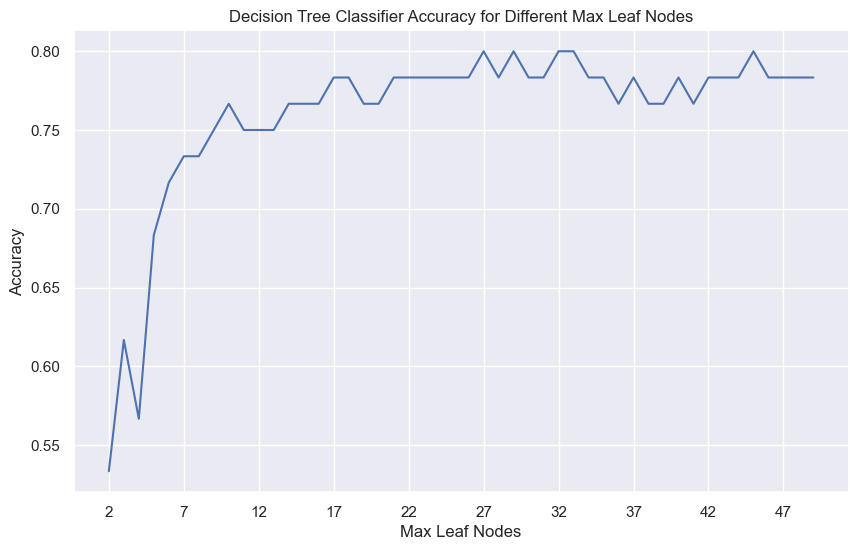

In [38]:
# Decision Tree Classifier - Model Tuning
score_list_dt = []
for i in range(2, 50):
    dt_classifier = DecisionTreeClassifier(max_leaf_nodes=i)
    dt_classifier.fit(X_train, y_train)
    score_list_dt.append(dt_classifier.score(X_test, y_test))

# Plot Decision Tree Classifier - Model Tuning
plt.figure(figsize=(10, 6))
plt.plot(range(2, 50), score_list_dt)
plt.title('Decision Tree Classifier Accuracy for Different Max Leaf Nodes')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Accuracy')
plt.xticks(np.arange(2, 50, 5))
plt.grid(True)
plt.show()

## 7.6 Random Forest

In [39]:
# Random Forest
RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)
y_pred_rf = RFclassifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print('Random Forest accuracy: {:.2f}%'.format(rf_accuracy * 100))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest accuracy: 81.67%
              precision    recall  f1-score   support

       DrugY       0.88      0.73      0.80        30
       drugA       0.67      0.80      0.73         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.84      0.89      0.86        18

    accuracy                           0.82        60
   macro avg       0.76      0.88      0.81        60
weighted avg       0.83      0.82      0.82        60

[[22  2  1  2  3]
 [ 1  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 2  0  0  0 16]]


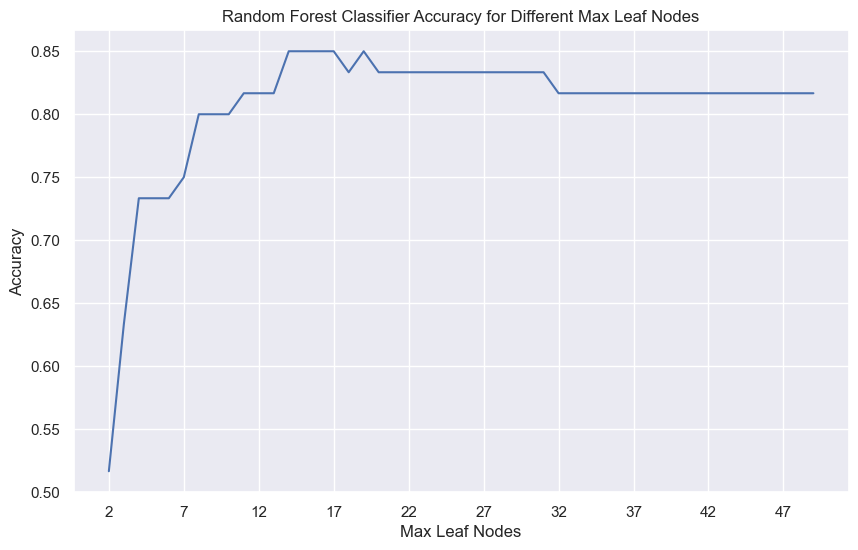

In [40]:
# Random Forest Classifier - Model Tuning
score_list_rf = []
for i in range(2, 50):
    rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=i)
    rf_classifier.fit(X_train, y_train)
    score_list_rf.append(rf_classifier.score(X_test, y_test))

# Plot Random Forest Classifier - Model Tuning
plt.figure(figsize=(10, 6))
plt.plot(range(2, 50), score_list_rf)
plt.title('Random Forest Classifier Accuracy for Different Max Leaf Nodes')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Accuracy')
plt.xticks(np.arange(2, 50, 5))
plt.grid(True)
plt.show()


# 8. Model Comparison 👀

In [41]:
import pandas as pd
# Define the accuracy scores for each model
accuracy_scores = {
    'Logistic Regression': lr_accuracy * 100,
    'K Neighbors': knn_accuracy * 100,
    'Support Vector Machine': SVCAcc,
    'Categorical Naive Bayes': nb_accuracy1 * 100,
    'Gaussian Naive Bayes': nb_accuracy2 * 100,
    'Decision Tree': dt_accuracy * 100,
    'Random Forest': rf_accuracy * 100
}

# Create DataFrame for model comparison
model_comparison = pd.DataFrame(accuracy_scores.items(), columns=['Model', 'Accuracy'])

# Sort the DataFrame by Accuracy in descending order
model_comparison.sort_values(by='Accuracy', ascending=False, inplace=True)

# Print the sorted DataFrame
model_comparison

,Model,Accuracy
2,Support Vector Machine,85.000000
4,Gaussian Naive Bayes,85.000000
0,Logistic Regression,83.333333
3,Categorical Naive Bayes,81.666667
6,Random Forest,81.666667
5,Decision Tree,78.333333
1,K Neighbors,65.000000


👉 From the results, it can be seen that most of ML models can reach **up to 80% accuracy** in predicting classification of drug type.

# 9. Output 📤
👉 The next step will make output results in csv file.

## 9.1 Transforming prediction in appropriate output format 🧹

In [42]:
# Save predictions to a CSV file
prediction = pd.DataFrame({
    'Sex_F': X_test.loc[:, "Sex_F"],
    'Sex_M': X_test.loc[:, "Sex_M"],
    'BP_HIGH': X_test.loc[:, "BP_HIGH"],
    'BP_LOW': X_test.loc[:, "BP_LOW"],
    'BP_NORMAL': X_test.loc[:, "BP_NORMAL"],
    'Cholesterol_HIGH': X_test.loc[:, "Cholesterol_HIGH"],
    'Cholesterol_NORMAL': X_test.loc[:, "Cholesterol_NORMAL"],
    'Age_binned_<20s': X_test.loc[:, "Age_binned_<20s"],
    'Age_binned_20s': X_test.loc[:, "Age_binned_20s"],
    'Age_binned_30s': X_test.loc[:, "Age_binned_30s"],
    'Age_binned_40s': X_test.loc[:, "Age_binned_40s"],
    'Age_binned_50s': X_test.loc[:, "Age_binned_50s"],
    'Age_binned_60s': X_test.loc[:, "Age_binned_60s"],
    'Age_binned_>60s': X_test.loc[:, "Age_binned_>60s"],
    'Na_to_K_binned_<10': X_test.loc[:, "Na_to_K_binned_<10"],
    'Na_to_K_binned_10-20': X_test.loc[:, "Na_to_K_binned_10-20"],
    'Na_to_K_binned_20-30': X_test.loc[:, "Na_to_K_binned_20-30"],
    'Na_to_K_binned_>30': X_test.loc[:, "Na_to_K_binned_>30"],
    'DrugType': y_pred_lr  # Assuming LRclassifier is the best model
})


In [43]:
# Sex
prediction['Sex_F'] = prediction['Sex_F'].replace([1, 0],['Female', 'Male'])

#BP
prediction['BP_HIGH'] = prediction['BP_HIGH'].replace([1, 0],['High',''])
prediction['BP_LOW'] = prediction['BP_LOW'].replace([1, 0],['Low', ''])
prediction['BP_NORMAL'] = prediction['BP_NORMAL'].replace([1, 0],['Normal', ''])

prediction['BP_HIGH'] = np.where((prediction['BP_HIGH'] == ''), prediction['BP_LOW'], prediction['BP_HIGH'])
prediction['BP_HIGH'] = np.where((prediction['BP_HIGH'] == ''), prediction['BP_NORMAL'], prediction['BP_HIGH'])

#Cholestrol
prediction['Cholesterol_HIGH'] = prediction['Cholesterol_HIGH'].replace([1, 0],['High', 'Normal'])

#Age_binned
prediction['Age_binned_<20s'] = prediction['Age_binned_<20s'].replace([1, 0],['<20s',''])
prediction['Age_binned_20s'] = prediction['Age_binned_20s'].replace([1, 0],['20s',''])
prediction['Age_binned_30s'] = prediction['Age_binned_30s'].replace([1, 0],['30s',''])
prediction['Age_binned_40s'] = prediction['Age_binned_40s'].replace([1, 0],['40s',''])
prediction['Age_binned_50s'] = prediction['Age_binned_50s'].replace([1, 0],['50s',''])
prediction['Age_binned_60s'] = prediction['Age_binned_60s'].replace([1, 0],['60s',''])
prediction['Age_binned_>60s'] = prediction['Age_binned_>60s'].replace([1, 0],['>60s',''])

prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_20s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_30s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_40s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_50s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_60s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_>60s'], prediction['Age_binned_<20s'])

#Na to K
prediction['Na_to_K_binned_<10'] = prediction['Na_to_K_binned_<10'].replace([1, 0],['<10',''])
prediction['Na_to_K_binned_10-20'] = prediction['Na_to_K_binned_10-20'].replace([1, 0],['10-20',''])
prediction['Na_to_K_binned_20-30'] = prediction['Na_to_K_binned_20-30'].replace([1, 0],['20-30',''])
prediction['Na_to_K_binned_>30'] = prediction['Na_to_K_binned_>30'].replace([1, 0],['>30s',''])

prediction['Na_to_K_binned_<10'] = np.where((prediction['Na_to_K_binned_<10'] == ''), prediction['Na_to_K_binned_10-20'], prediction['Na_to_K_binned_<10'])
prediction['Na_to_K_binned_<10'] = np.where((prediction['Na_to_K_binned_<10'] == ''), prediction['Na_to_K_binned_20-30'], prediction['Na_to_K_binned_<10'])
prediction['Na_to_K_binned_<10'] = np.where((prediction['Na_to_K_binned_<10'] == ''), prediction['Na_to_K_binned_>30'], prediction['Na_to_K_binned_<10'])

# Drop columns
prediction = prediction.drop(['Sex_M', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_NORMAL', 'Age_binned_20s', 'Age_binned_30s',
                 'Age_binned_40s', 'Age_binned_50s', 'Age_binned_60s', 'Age_binned_>60s',
                'Na_to_K_binned_10-20', 'Na_to_K_binned_20-30', 'Na_to_K_binned_>30'], axis = 1)

In [44]:
# Rename columns name
new_name = {'Sex_F': 'Sex', 'BP_HIGH': 'BP', 'Cholesterol_HIGH': 'Cholesterol', 'Age_binned_<20s': 'Age_binned',
          'Na_to_K_binned_<10': 'Na_to_K_binned'}
prediction.rename(columns=new_name, inplace=True)

## 9.2 Generating output file (CSV) 📄

In [48]:
prediction = pd.read_csv(r"C:\Users\Lokesh Patra\Documents\Projects\IBM ICE Day 2\prediction.csv")
prediction.head()

,Sex,BP,Cholesterol,Age_binned,Na_to_K_binned,DrugType
0,Male,Low,High,20s,<10,drugX
1,Female,Normal,High,20s,10-20,drugX
2,Male,Low,High,40s,20-30,DrugY
3,Male,High,Normal,20s,>30s,DrugY
4,Male,Normal,High,20s,20-30,DrugY


# 10. References 🔗
#### > Paw Repository
#### > Global MedScience
#### > LabBase_